<a href="https://colab.research.google.com/github/Amar1701/DataScienceIntern/blob/main/Exploratory_data_analysis_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:

#Load Data

cc=pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")
cc.head()


<ipython-input-53-b356721e30a2>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  cc=pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:

cc.shape

(181691, 135)

In [ ]:

cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:

cc.corr()

<ipython-input-56-198ba5fc0ade>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cc.corr()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [ ]:
cc.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:

cc.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Targeted','nkill':'No.of.Kill',
                       'nwound':'No.of.Wounded','gname':'Gang','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:

cc=cc[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','No.of.Kill',
               'No.of.Wounded','Targeted','Gang','Target_type','Weapon_type','Motive']]

In [ ]:
cc.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,No.of.Kill,No.of.Wounded,Targeted,Gang,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:


# Calculate the number of missing values in each column
missing_counts = cc.isnull().sum()

# Print the result
print(missing_counts)

Year                  0
Month                 0
Day                   0
Country               0
state               421
Region                0
city                434
latitude           4556
longitude          4557
AttackType            0
No.of.Kill        10313
No.of.Wounded     16311
Targeted            636
Gang                  0
Target_type           0
Weapon_type           0
Motive           131130
dtype: int64


In [ ]:

cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   state          181270 non-null  object 
 5   Region         181691 non-null  object 
 6   city           181257 non-null  object 
 7   latitude       177135 non-null  float64
 8   longitude      177134 non-null  float64
 9   AttackType     181691 non-null  object 
 10  No.of.Kill     171378 non-null  float64
 11  No.of.Wounded  165380 non-null  float64
 12  Targeted       181055 non-null  object 
 13  Gang           181691 non-null  object 
 14  Target_type    181691 non-null  object 
 15  Weapon_type    181691 non-null  object 
 16  Motive         50561 non-null   object 
dtypes: float64(4), int64(3), obje

In [ ]:
#Printing the Most Attacked Country

print("Most Attacked Country:",cc["Country"].value_counts().idxmax())

Most Attacked Country: Iraq


In [ ]:
#Printing the Most Attacked City

print("Most Attacked City:",cc["city"].value_counts().index[1])

Most Attacked City: Baghdad


In [ ]:

# Printing the Most Attacked Region

print("Most Attacked Region:",cc["Region"].value_counts().idxmax())

Most Attacked Region: Middle East & North Africa


In [ ]:
#Printing the  Most Attacked Gang

print("Most Attacked Gang:",cc['Gang'].value_counts().index[1])

Most Attacked Gang: Taliban


In [ ]:

killData = cc.loc[:,'No.of.Kill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [ ]:
countryData = cc.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='No.of.Kill', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
No.of.Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


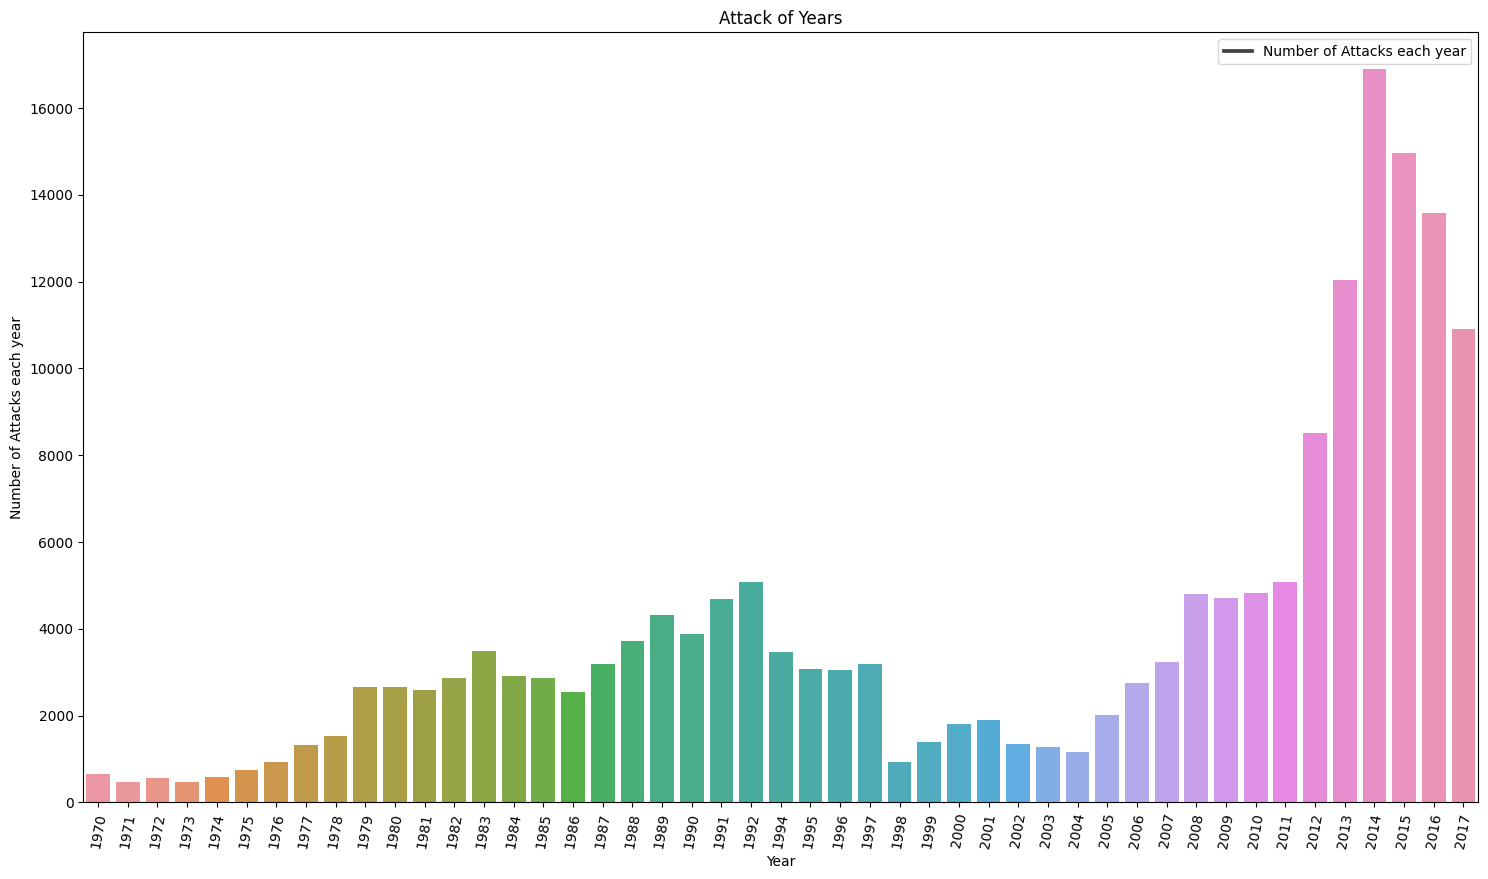

In [ ]:

# Count the number of attacks for each year and sort by year
m = cc['Year'].value_counts(dropna=False).sort_index()

# Get the unique years
n = cc['Year'].unique()

# Create a figure for the plot
plt.figure(figsize=(18, 10))

# Create a bar plot using Seaborn
sns.barplot(x=n, y=m)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=80)

# Set the label for the y-axis
plt.ylabel('Number of Attacks each year')

# Add a legend
plt.legend(labels=['Number of Attacks each year'])

# Set the label for the x-axis
plt.xlabel('Year')

# Set the title of the plot
plt.title('Attack of Years')

# Display the plot
plt.show()

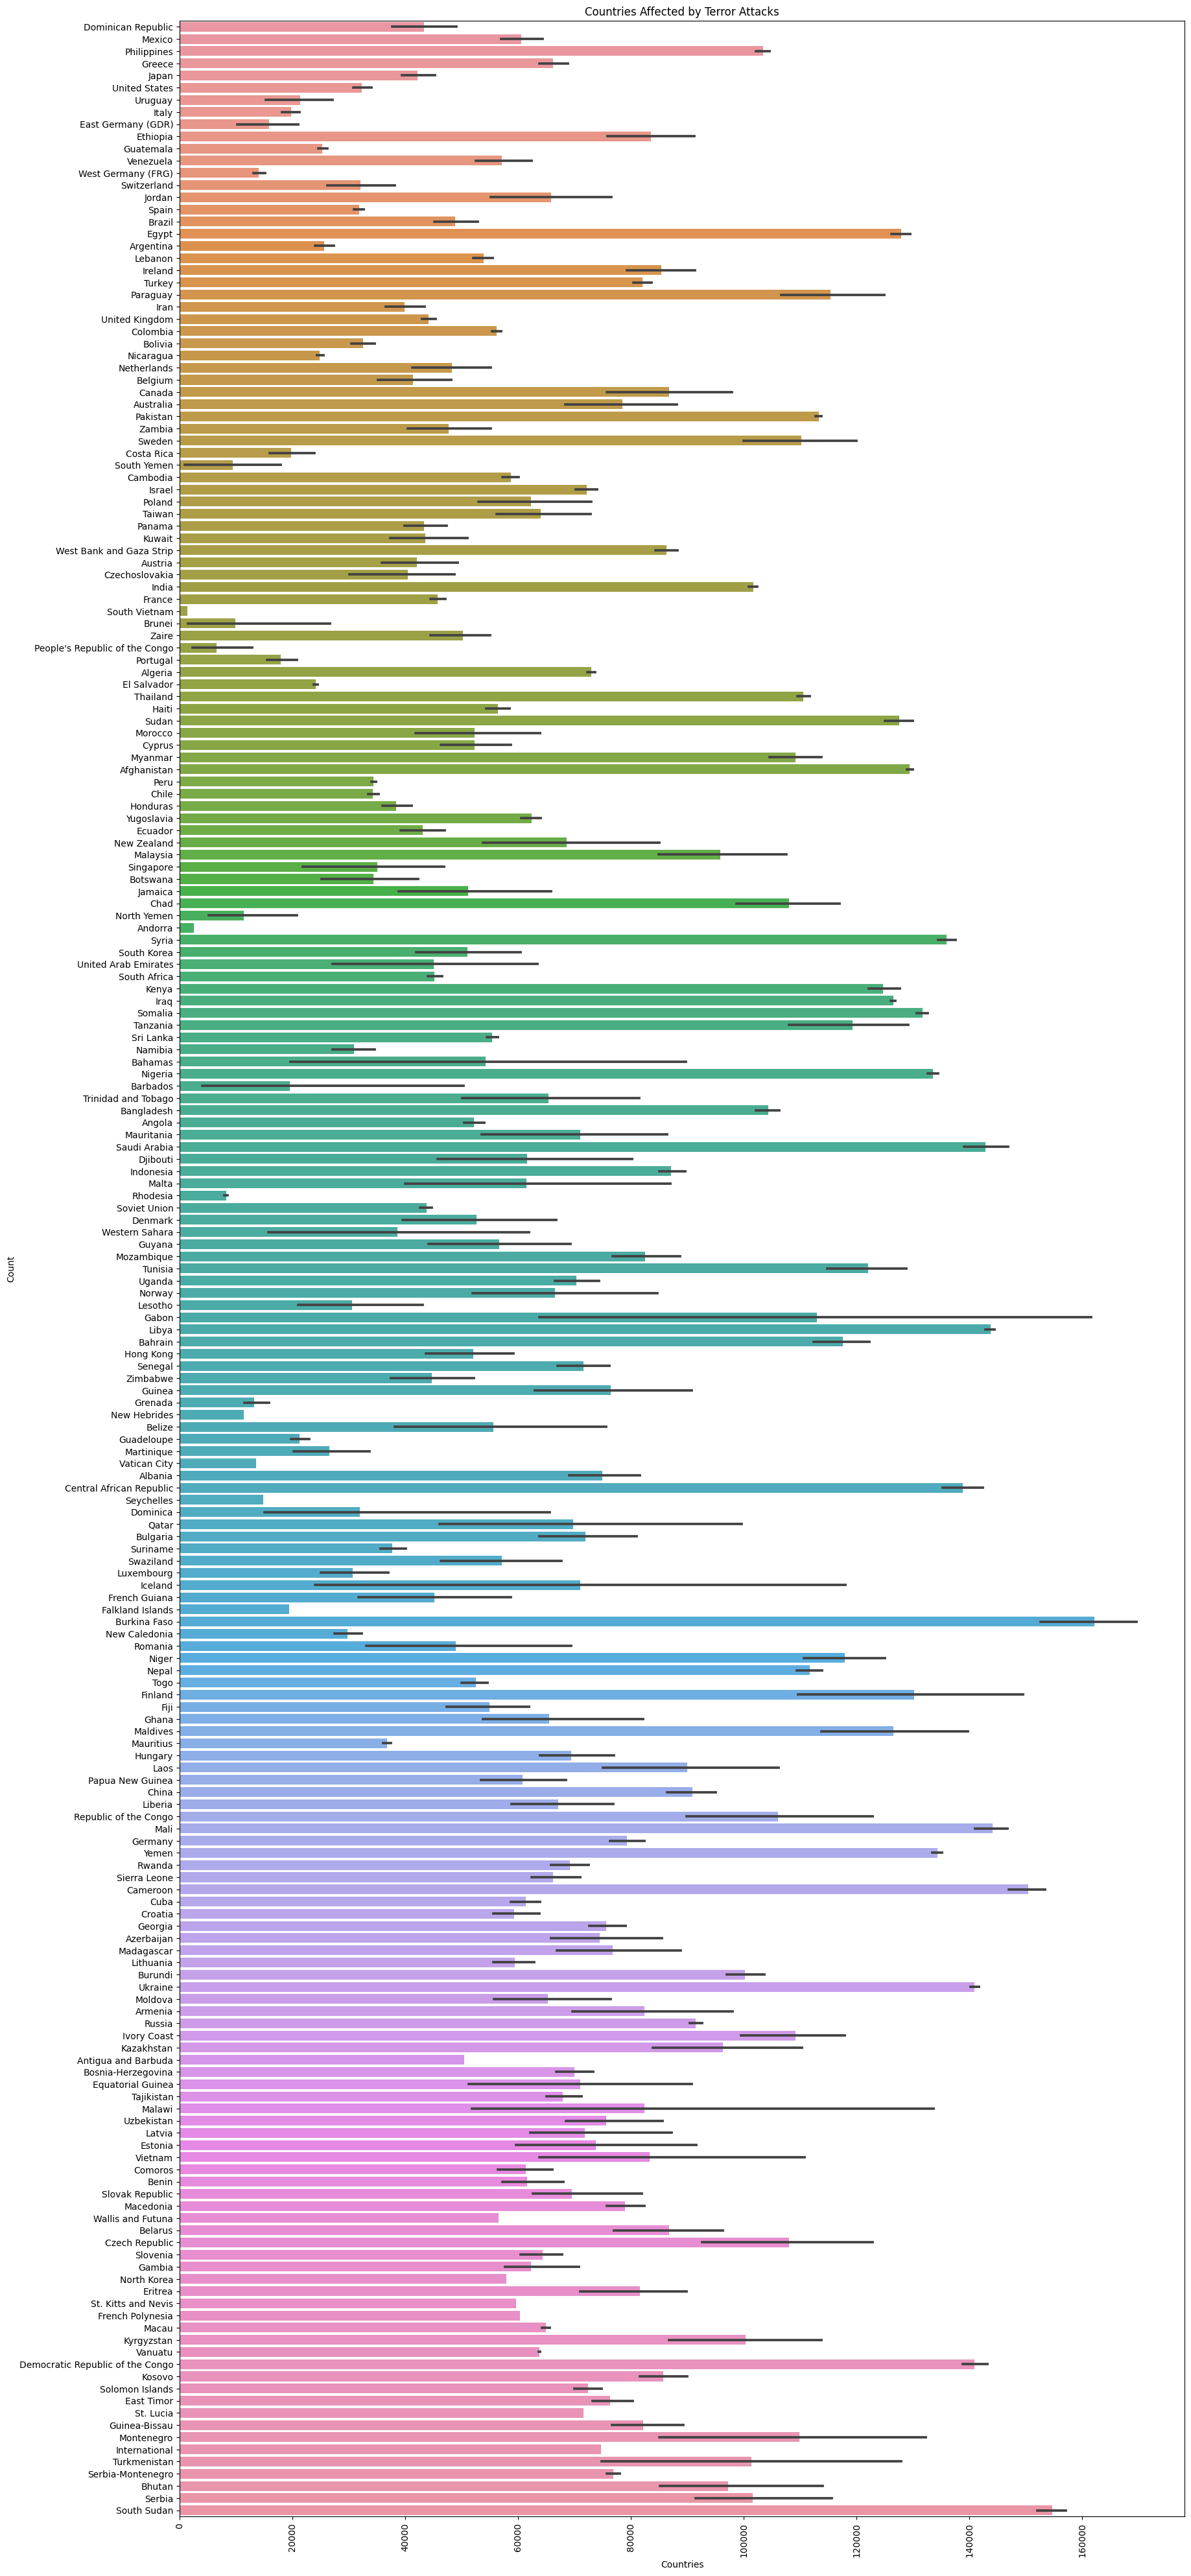

In [ ]:
# Create a subplot with a specific figure size
plt.subplots(figsize=(20, 50))

# Create a bar plot using Seaborn
# cc['Country'].index refers to the index (x-axis) of the DataFrame
# cc['Country'].values refers to the values (y-axis) of the DataFrame
sns.barplot(x=cc['Country'].index, y=cc['Country'].values)

# Set the title of the plot
plt.title('Countries Affected by Terror Attacks')

# Set the label for the y-axis
plt.ylabel('Count')

# Set the label for the x-axis
plt.xlabel('Countries')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

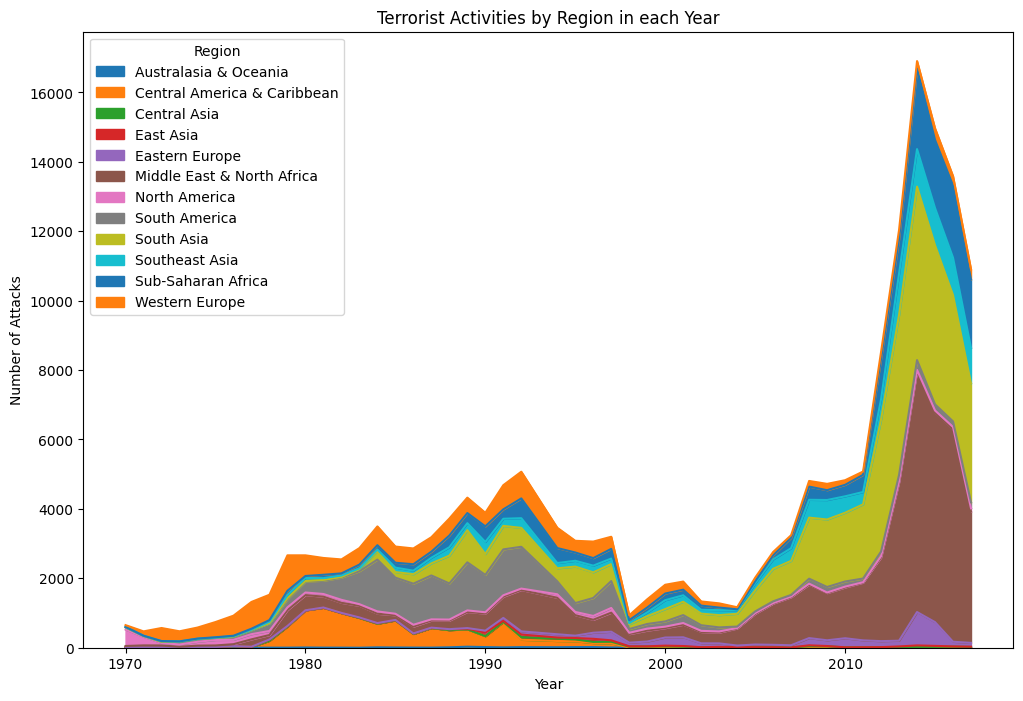

In [ ]:

pd.crosstab(cc.Year, cc.Region).plot(kind="area",figsize=(12,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:

cc.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

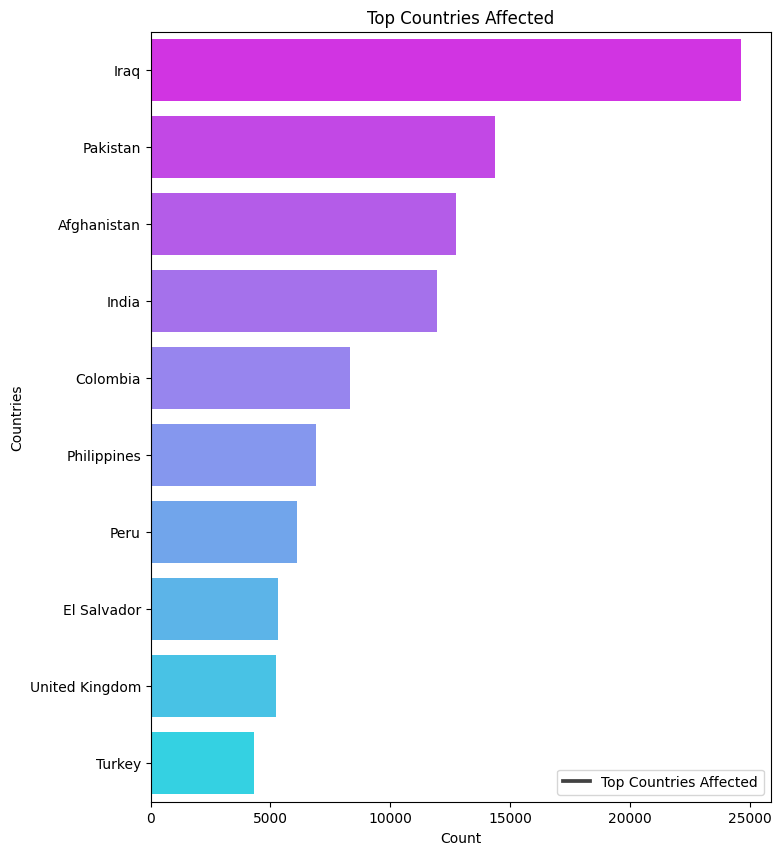

In [ ]:
# Create a subplot with a specific figure size
plt.subplots(figsize=(8, 10))

# Calculate the top 10 affected countries and their counts
top_countries = cc['Country'].value_counts()[:10]

# Create a bar plot using Seaborn
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool_r')

# Set the title of the plot
plt.title('Top Countries Affected')

# Set the label for the x-axis
plt.xlabel('Count')

# Set the label for the y-axis
plt.ylabel('Countries')

# Add a legend
plt.legend(labels=['Top Countries Affected'])

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [ ]:
cc.Gang.value_counts()[1:5]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Name: Gang, dtype: int64

In [ ]:
GangMost1 = cc[cc.Gang.isin(['Taliban'])]
GangMost1.Country.unique()

array(['Afghanistan', 'Pakistan', 'Turkmenistan'], dtype=object)

In [ ]:
GangMost1.Region.unique()

GangMost1.city.unique()

array(['Unknown', 'Kandahar', 'Kabul', ..., 'Ibrahim Khel',
       'Pad Khwabi Shanah', 'Hayatah'], dtype=object)

In [ ]:

GangMost2 = cc[cc.Gang.isin(['Islamic State of Iraq and the Levant (ISIL)'])]
GangMost2.Country.unique()

array(['Syria', 'Iraq', 'Turkey', 'Tunisia', 'Lebanon', 'Israel',
       'Belgium', 'Egypt', 'Libya', 'Saudi Arabia',
       'West Bank and Gaza Strip', 'France', 'Bahrain', 'Jordan',
       'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [ ]:
GangMost2.Region.unique()

array(['Middle East & North Africa', 'Western Europe',
       'Sub-Saharan Africa', 'Southeast Asia', 'Eastern Europe',
       'Central Asia', 'Australasia & Oceania'], dtype=object)

In [ ]:

GangMost2.city.unique()

array(['Atmeh', 'Baghdad', 'Latifiyah', 'Mahmudiyah', 'Samarra',
       'Reyhanli', 'Mosul', 'Unknown', 'Madain', 'Jisr Diyala',
       'Saba al-Bor', 'Tal Afar', 'Taji', 'Karma', 'Al-Jadidah',
       'Himreen', 'Al-Adheim', 'Jabalah', 'Kut', 'Basra', 'Nasiriyah',
       'Najaf', 'Tuz Khormato', 'Mahawil', 'Arbil', 'Shirqat', 'Fallujah',
       'Hadhar', 'Athba', 'Nahrawan', 'Tikrit', 'Dujail', 'Sabboura',
       'Muqdadiyah', 'Baqubah', 'Abu Ghraib', 'Amarah', 'Samawah',
       'Jurf al-Sakhar', 'Karbala', 'Musayyib', 'Baiji', 'Sulayman Beg',
       'Tunis', 'Damascus', 'Rabia', 'Anah', 'Yathrib',
       'Amiriyat Al-Fallujah', 'Raqqah', 'Qamishli', 'Aleppo',
       'Mannagh Air Base', 'Husseiniyah', 'Al-Zubeidiyah', 'Kirkuk',
       'Al-Madaen', 'Tarmiyah', 'Sejou', 'Hamah', 'Hillah',
       'Iskandariyah', 'Al-Debis', 'Buhriz', 'Tal Abyad', 'Hawijah',
       'Qabak', 'Hawijah district', 'Saraqib', 'Mandali', 'Abu Sayda',
       'Alam', 'Diwaniyah', 'Nabak', 'Deir Attiyeh', 'Siniyah'

In [ ]:

GangMost3 = cc[cc.Gang.isin(['Shining Path (SL)'])]


In [ ]:
GangMost3.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico'],
      dtype=object)

In [ ]:

GangMost3.Region.unique()

array(['South America', 'North America'], dtype=object)

In [ ]:

GangMost3.city.unique()

array(['Ayacucho', 'Uchuraccay', 'Huaraz', 'Tarma', 'Talma', 'Cusco',
       'Cusco district', 'Huancavelica district', 'Chilca',
       'La Voz de Ayachucho', 'Mujillo', 'Lima', 'Unknown',
       'Huancavelica', 'Paipa', 'Huancayo', 'Sicuani', 'Acos District',
       'Yauli', 'Cutervo', 'Chimbote', 'Iquitos', 'Trujillo',
       'Sicuani district', 'Lurigancho', 'Ilo', 'Arequipa',
       'Villa Maria del Triunfo', 'Chiclayo', 'ILO', 'Cajamarca',
       'Villa El Salvador', 'Huanta', 'Quinua', 'Tacna', 'Mantaro',
       'Cerro de Pasco', 'Huacho', 'Huancayo district', 'Abancay',
       'Vinchos', 'Vivichos', 'ICA', 'Huarochiri', 'Cachi-Cachi',
       'Quillabamba', 'Azangaro', 'Chunta', 'Oyon',
       'Vilcashuaman district', 'Vilcashuaman', 'Marcabal', 'Concepcion',
       'Chumbes', 'Cajamarquilla', 'Jauja', 'Huambalpa', 'Oroya',
       'Chupaca', 'Tambo', 'Acos Vinchos', 'Chacari', 'Ayacucho district',
       'San Martin de Paras district', 'Jaen', 'Sequeslambra',
       'Chaupimarca

In [ ]:


attackData = cc.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [ ]:
attacktypeKill = typeKillData.pivot_table(columns='AttackType', values='No.of.Kill', aggfunc='sum')
attacktypeKill

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
No.of.Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


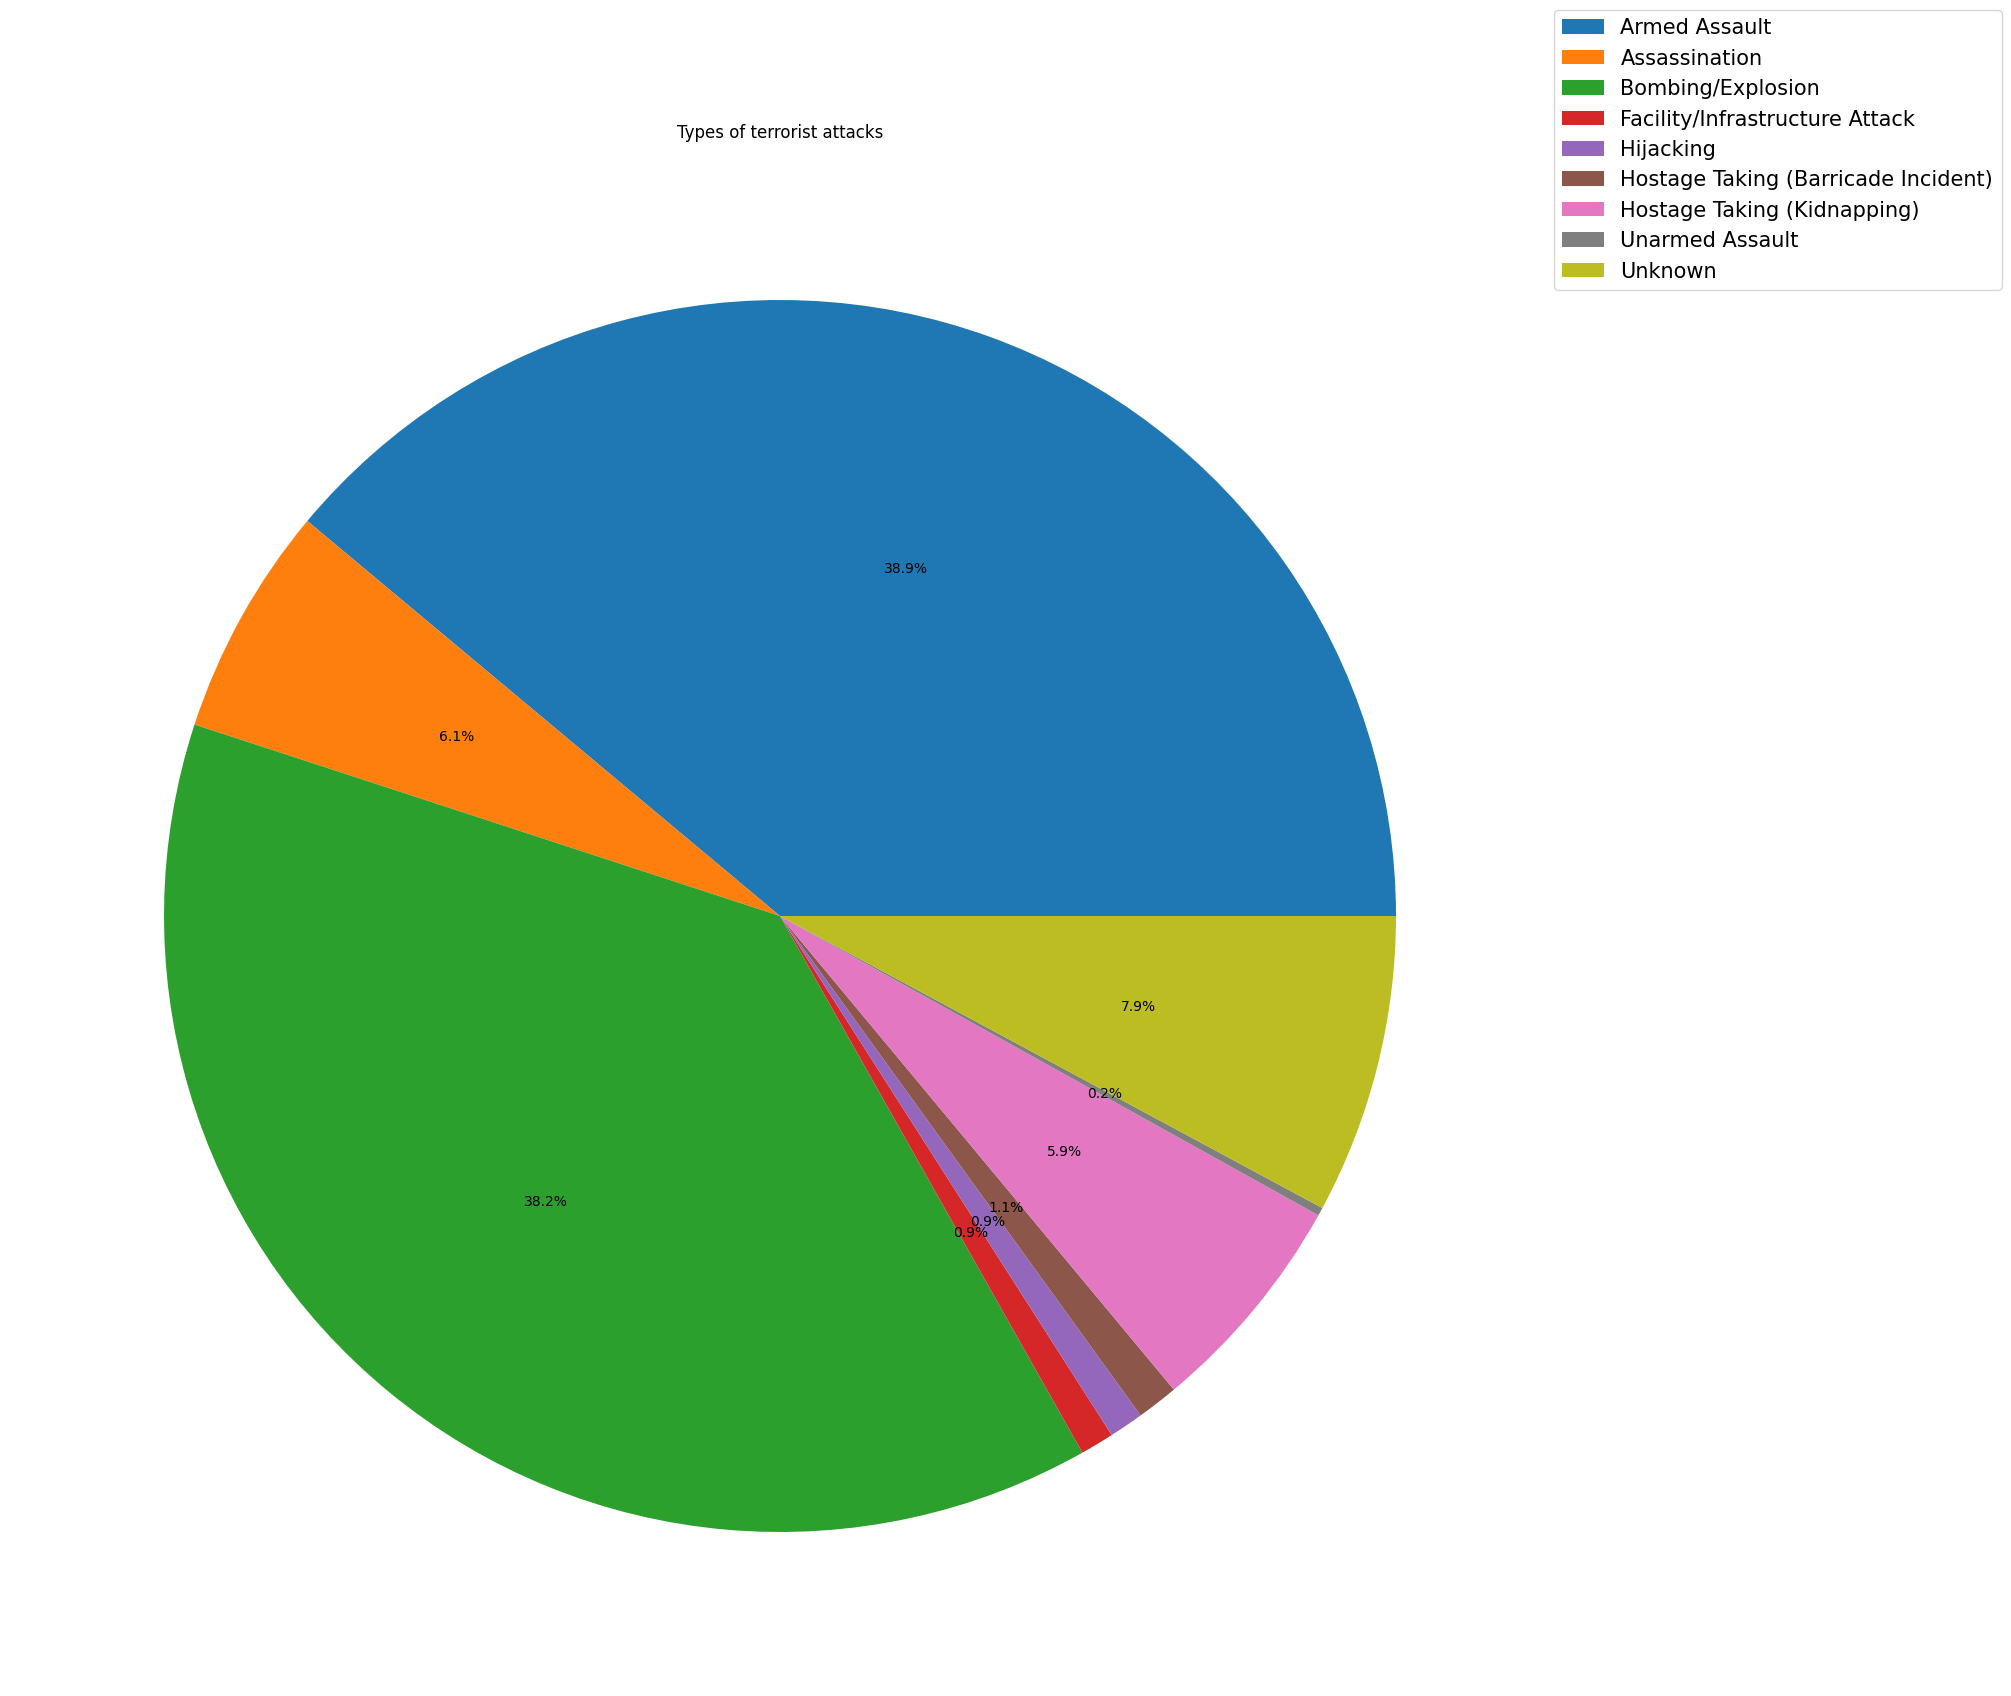

In [ ]:
# Assuming attacktypeKill and labels are defined

# Convert the DataFrame columns to a list
labels = attacktypeKill.columns.tolist()

# Transpose the DataFrame
transposed = attacktypeKill.T

# Convert the transposed DataFrame values to a 1D list
values = transposed.values.flatten()

# Create the pie chart
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=360, autopct='%.1f%%')

# Set the title of the plot
plt.title('Types of terrorist attacks')

# Create a legend with labels and adjust its position
plt.legend(labels, loc='lower right', bbox_to_anchor=(1.3, 0.9), fontsize=15)

# Display the plot
plt.show()